In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/Shimla(1).csv')

In [ ]:
df

,Year,Month,Flights (Chandigarh),Search_Index,Crime_Cases,Domestic Tourist,Foreign Tourist
0,2010,January,1422,17,NaN,165247,7065
1,2010,February,1543,18,NaN,155554,6306
2,2010,March,1754,21,NaN,176551,12410
3,2010,April,1965,24,NaN,351393,12207
4,2010,May,2176,25,NaN,360096,9534
...,...,...,...,...,...,...,...
151,2022,August,"3,442",65,180.0,121224,1180
152,2022,September,"3,653",67,154.0,118791,1145
153,2022,October,"3,864",61,138.0,132786,1545
154,2022,November,"4,075",65,110.0,126147,1504


In [ ]:
df['Month'] = df['Month'].map({
    'January':1,
    'February':2,
    'March':3,
    'April':4,
    'May':5,
    'June':6,
    'July':7,
    'August':8,
    'September':9,
    'October':10,
    'November':11,
    'December':12
})

In [ ]:
df['Date'] = pd.to_datetime(df['Year'].astype('str')+'-'+df['Month'].astype('str')+'-'+'01')
df.head()

,Year,Month,Flights (Chandigarh),Search_Index,Crime_Cases,Domestic Tourist,Foreign Tourist,Date
0,2010,1,1422,17,NaN,165247,7065,2010-01-01
1,2010,2,1543,18,NaN,155554,6306,2010-02-01
2,2010,3,1754,21,NaN,176551,12410,2010-03-01
3,2010,4,1965,24,NaN,351393,12207,2010-04-01
4,2010,5,2176,25,NaN,360096,9534,2010-05-01


In [ ]:
columns_to_convert = [col for col in df.columns if col != 'DateTime' and col != 'Crime_Cases']

In [ ]:
df = df[columns_to_convert].copy()

In [ ]:
df['Total_tourist'] = df['Domestic Tourist'] + df['Foreign Tourist']

In [ ]:
df

,Year,Month,Flights (Chandigarh),Search_Index,Domestic Tourist,Foreign Tourist,Date,Total_tourist
0,2010,1,1422,17,165247,7065,2010-01-01,172312
1,2010,2,1543,18,155554,6306,2010-02-01,161860
2,2010,3,1754,21,176551,12410,2010-03-01,188961
3,2010,4,1965,24,351393,12207,2010-04-01,363600
4,2010,5,2176,25,360096,9534,2010-05-01,369630
...,...,...,...,...,...,...,...,...
151,2022,8,"3,442",65,121224,1180,2022-08-01,122404
152,2022,9,"3,653",67,118791,1145,2022-09-01,119936
153,2022,10,"3,864",61,132786,1545,2022-10-01,134331
154,2022,11,"4,075",65,126147,1504,2022-11-01,127651


<Axes: >

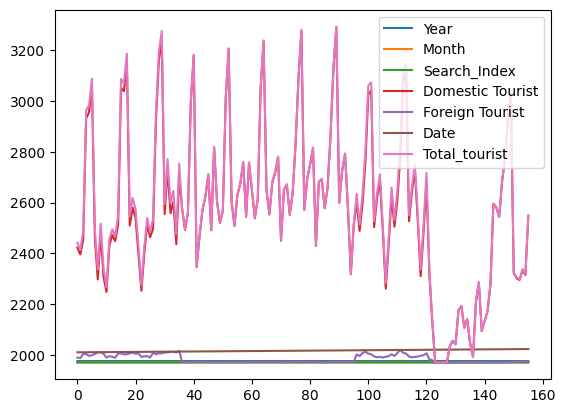

In [ ]:
df.plot()

<Axes: >

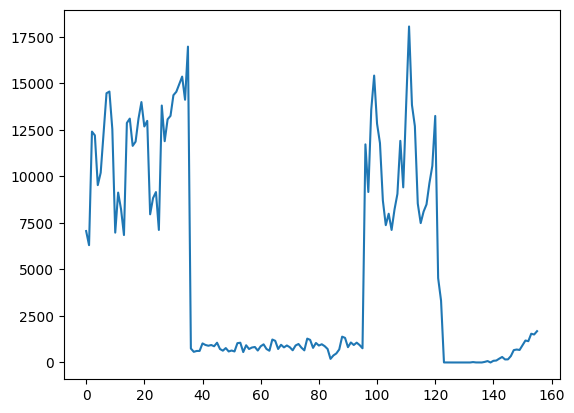

In [ ]:
df['Foreign Tourist'].plot()

In [ ]:
# Replace commas with an empty string and then convert to float
df['Flights (Chandigarh)'] = df['Flights (Chandigarh)'].str.replace(',', '').astype(float)

In [ ]:
# Replace non-finite values (NaN and inf) with a specific value (e.g., 0)
df['Flights (Chandigarh)'] = df['Flights (Chandigarh)'].replace([np.inf, -np.inf, np.nan], 0)

# Convert the column to integer
df['Flights (Chandigarh)'] = df['Flights (Chandigarh)'].astype(int)

In [ ]:
df['Seasonal First Order Difference']=df['Domestic Tourist']-df['Domestic Tourist'].shift(12)

<Axes: >

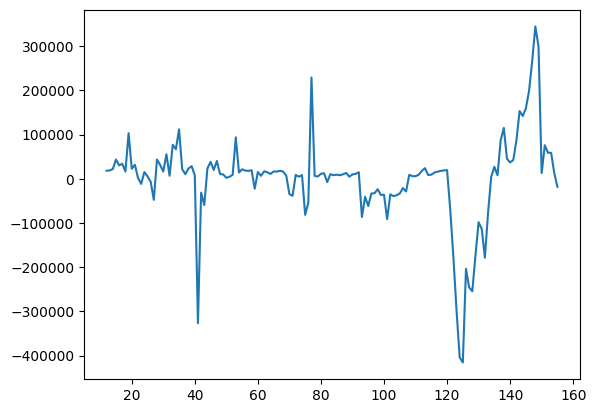

In [ ]:
df['Seasonal First Order Difference'].plot()

<Axes: >

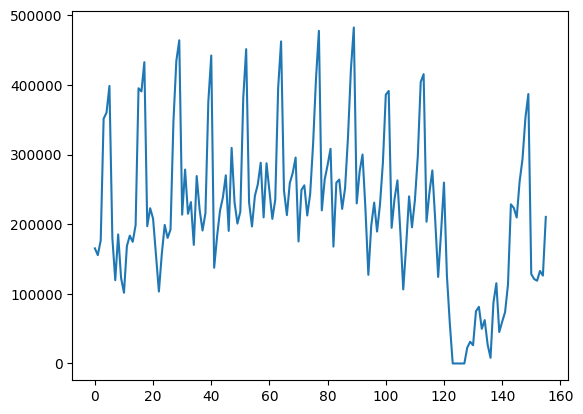

In [ ]:
df['Domestic Tourist'].plot()

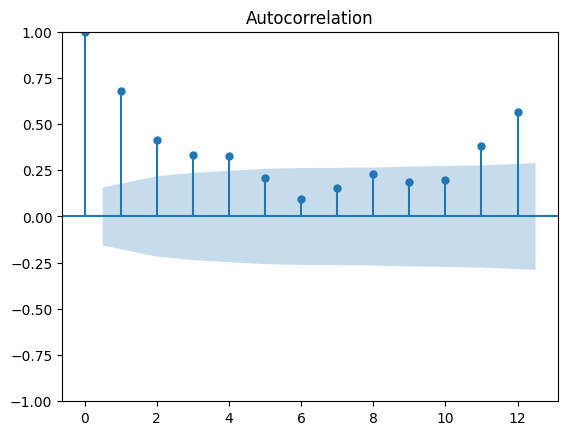

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_plot = plot_acf(df['Domestic Tourist'], lags = 12)

In [ ]:
df['Prev1'] = df['Domestic Tourist'].shift(1)
df['Prev12'] = df['Domestic Tourist'].shift(12)

In [ ]:
df['Total_tourist'] = df['Domestic Tourist'] + df['Foreign Tourist']

In [ ]:
X = df[['Flights (Chandigarh)', 'Search_Index','Prev1','Prev12']]
y = df['Domestic Tourist']

In [ ]:
X_train = X.iloc[:-48]
y_train = y.iloc[:-48]
X_test = X.iloc[-48:-36]
y_test = y.iloc[-48:-36]

In [ ]:
!pip install lazypredict

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

# Split your data into training and test sets (X_train, X_test, y_train, y_test)

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models

 74%|███████▍  | 31/42 [00:01<00:00, 26.23it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:01<00:00, 23.04it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 138
[LightGBM] [Info] Number of data points in the train set: 108, number of used features: 4
[LightGBM] [Info] Start training from score 255133.490741
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.92,0.95,18314.22,0.12
OrthogonalMatchingPursuit,0.88,0.92,22568.23,0.01
SGDRegressor,0.88,0.92,23068.32,0.01
TransformedTargetRegressor,0.88,0.92,23175.16,0.01
LinearRegression,0.88,0.92,23175.16,0.01
Lars,0.88,0.92,23175.16,0.04
Lasso,0.88,0.92,23175.54,0.02
LassoLars,0.88,0.92,23177.20,0.01
Ridge,0.87,0.92,23327.85,0.01


In [ ]:
predictions

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.92,0.95,18314.22,0.12
OrthogonalMatchingPursuit,0.88,0.92,22568.23,0.01
SGDRegressor,0.88,0.92,23068.32,0.01
TransformedTargetRegressor,0.88,0.92,23175.16,0.01
LinearRegression,0.88,0.92,23175.16,0.01
Lars,0.88,0.92,23175.16,0.04
Lasso,0.88,0.92,23175.54,0.02
LassoLars,0.88,0.92,23177.20,0.01
Ridge,0.87,0.92,23327.85,0.01


<Axes: xlabel='Domestic Tourist', ylabel='Density'>

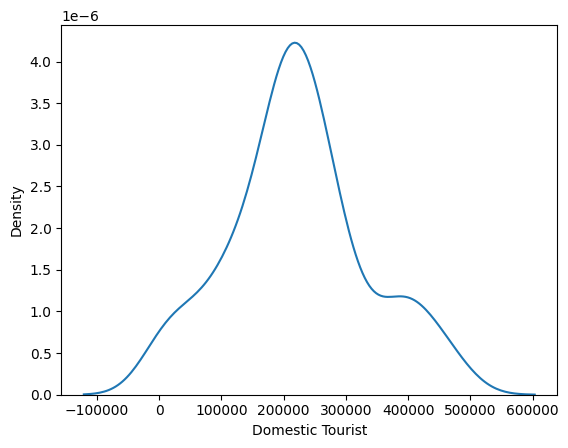

In [ ]:
import seaborn as sns
sns.kdeplot(df['Domestic Tourist'])

<Axes: xlabel='Foreign Tourist', ylabel='Density'>

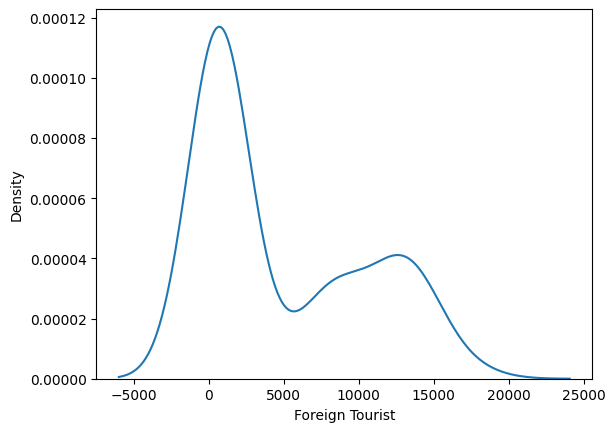

In [ ]:
sns.kdeplot(df['Foreign Tourist'])

<Axes: xlabel='Flights (Chandigarh)', ylabel='Density'>

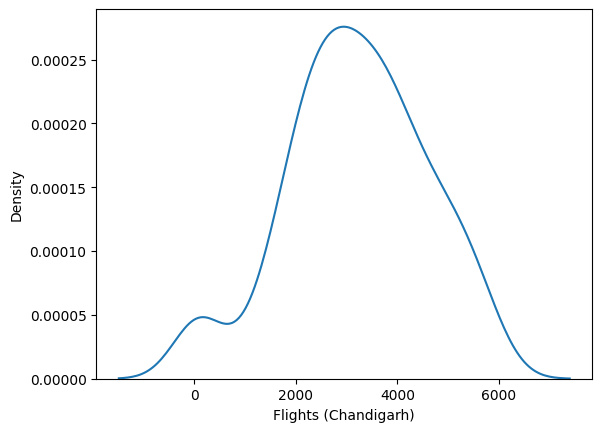

In [ ]:
sns.kdeplot(df['Flights (Chandigarh)'])

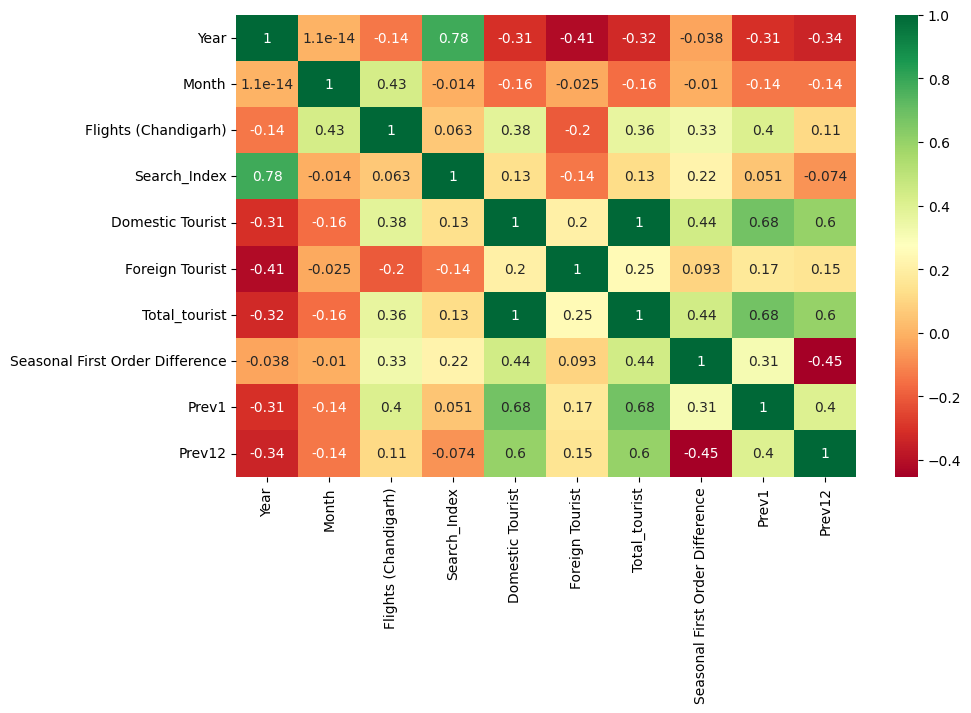

In [ ]:
import matplotlib.pyplot as plt
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (10,6))
# plot the heat map
g = sns.heatmap(df[top_corr_features].corr(), annot = True, cmap = 'RdYlGn')

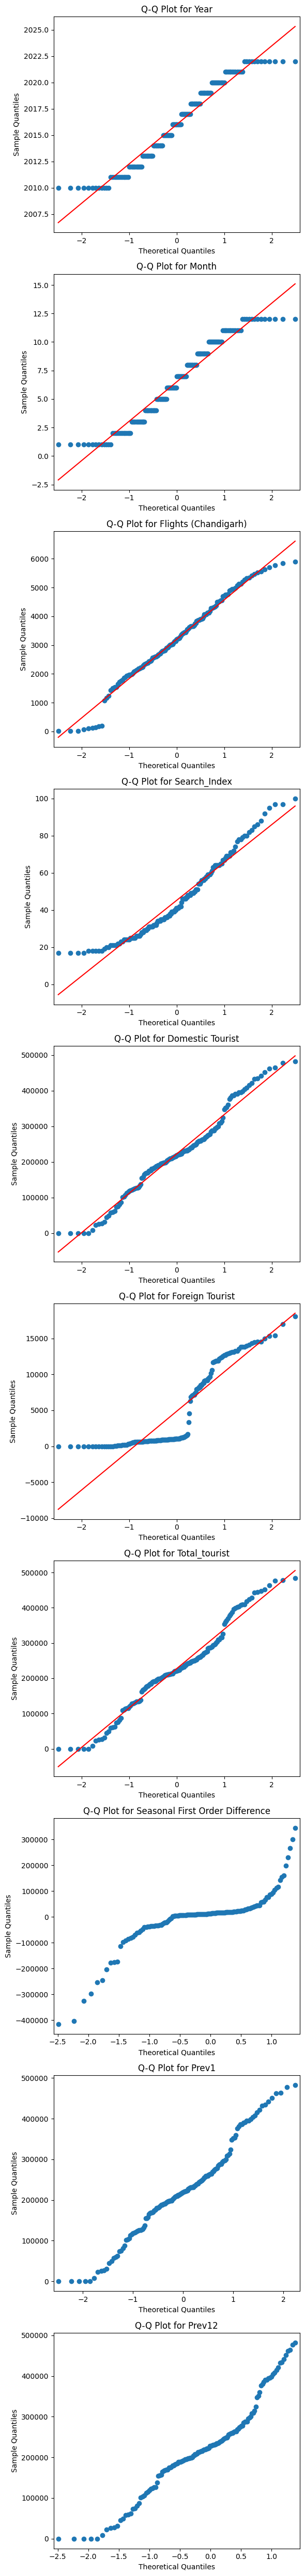

In [ ]:
import statsmodels.api as sm
numeric_columns = df.select_dtypes(include=['number'])

num_columns = len(numeric_columns.columns)
fig, axes = plt.subplots(num_columns, 1, figsize=(6, 5 * num_columns))
plt.tight_layout()

for i, col in enumerate(numeric_columns.columns):
    ax = axes[i]
    sm.qqplot(numeric_columns[col], line='s', ax=ax)
    ax.set_title(f'Q-Q Plot for {col}')

plt.tight_layout()
plt.show()

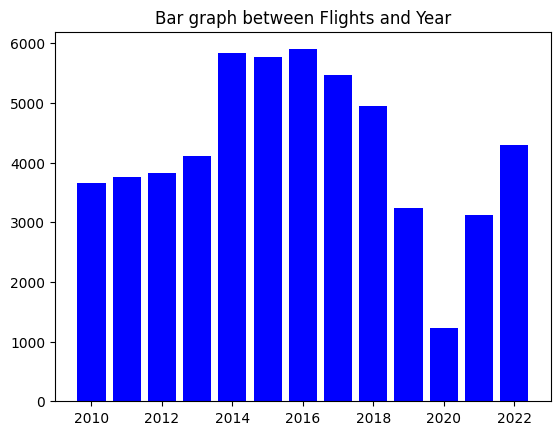

In [ ]:
plt.bar(df['Year'],df['Flights (Chandigarh)'], color = 'b')
plt.title('Bar graph between Flights and Year')
plt.show()

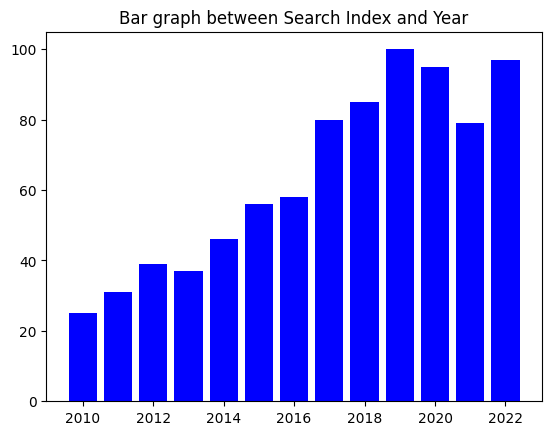

In [ ]:
plt.bar(df['Year'],df['Search_Index'], color = 'b')
plt.title('Bar graph between Search Index and Year')
plt.show()

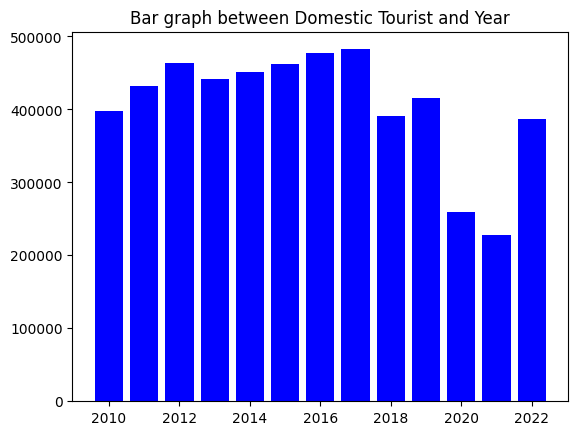

In [ ]:
plt.bar(df['Year'],df['Domestic Tourist'], color = 'b')
plt.title('Bar graph between Domestic Tourist and Year')
plt.show()

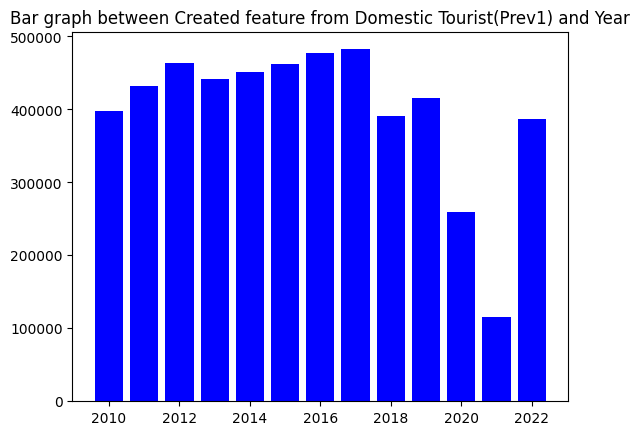

In [ ]:
plt.bar(df['Year'],df['Prev1'], color = 'b')
plt.title('Bar graph between Created feature from Domestic Tourist(Prev1) and Year')
plt.show()

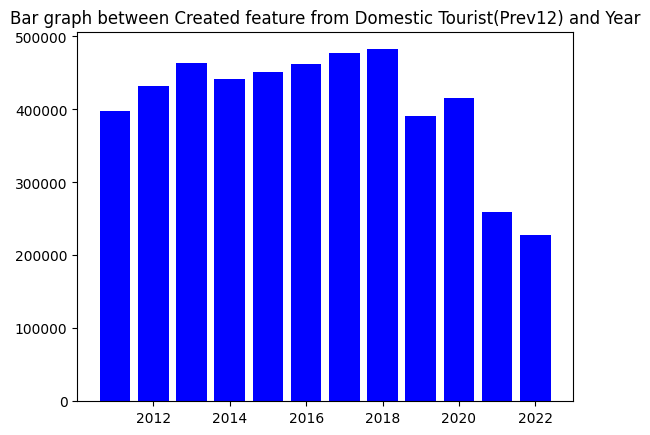

In [ ]:
plt.bar(df['Year'],df['Prev12'], color = 'b')
plt.title('Bar graph between Created feature from Domestic Tourist(Prev12) and Year')
plt.show()

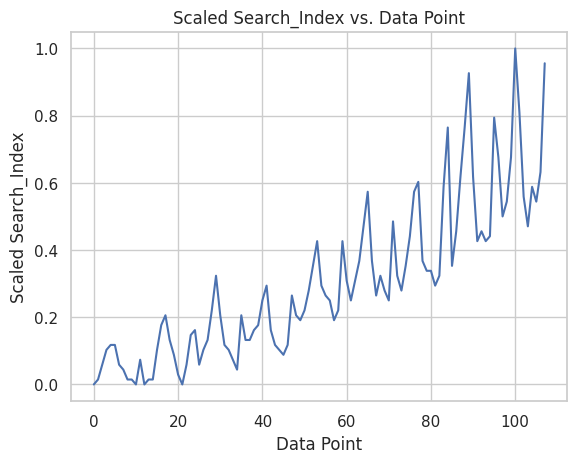

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a Pandas DataFrame 'X_train' with a 'Search_Index' column
# Extract the 'Search_Index' feature
Search_Index = X_train['Search_Index']

# Function to perform Min-Max scaling
def min_max_scaling(data):
    min_val = data.min()
    max_val = data.max()
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data

# Perform Min-Max scaling on 'Search_Index'
scaled_Search_Index = min_max_scaling(Search_Index)

# Create a plot for the scaled 'Search_Index'
# plt.grid()
plt.plot(scaled_Search_Index)
plt.title('Scaled Search_Index vs. Data Point')
plt.xlabel('Data Point')
plt.ylabel('Scaled Search_Index')
plt.show()

Text(0.5, 1.0, 'Search Index vs Data Point')

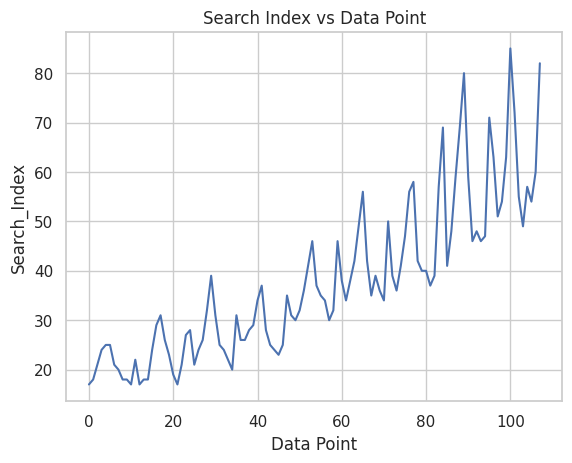

In [ ]:
X_train['Search_Index'].plot()
plt.xlabel('Data Point')
plt.ylabel('Search_Index')

plt.title('Search Index vs Data Point')

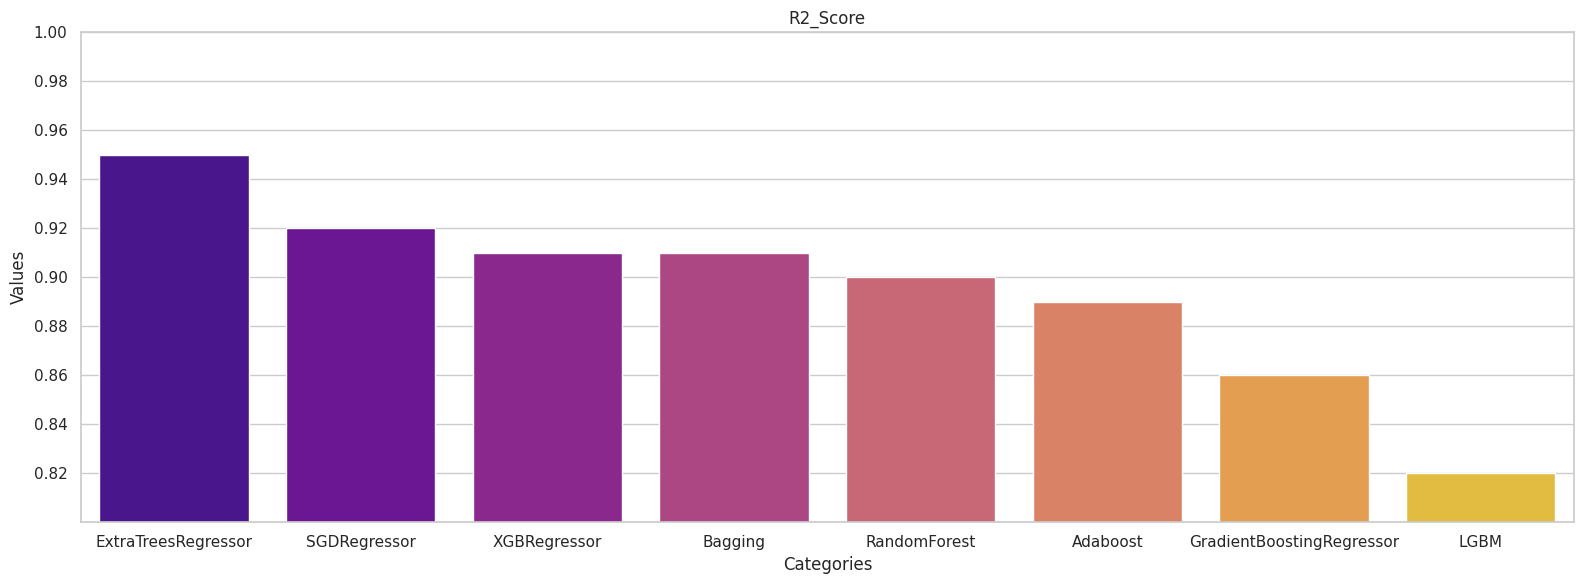

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Category': ['ExtraTreesRegressor', 'SGDRegressor', 'XGBRegressor', 'Bagging', 'RandomForest', 'Adaboost','GradientBoostingRegressor','LGBM'],
    'Values': [0.95, 0.92, 0.91, 0.91, 0.90, 0.89,0.86,0.82]
}

sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))
ax = sns.barplot(x='Category', y='Values', data=data, palette='plasma')

plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("R2_Score")

# Set a smaller y-axis range and customize y-tick labels
ax.set_ylim(0.8, 1.0)  # Change the range as per your preference
ax.set_yticks([0.82,0.84,0.86,0.88,0.90,0.92,0.94,0.96,0.98,1])

plt.tight_layout()
plt.show()